# Les packages

In [1]:
pip install umap-learn

     |████████████████████████████████| 86 kB 3.0 MB/s 
     |████████████████████████████████| 1.1 MB 28.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82708 sha256=57c856be7e96d71980f1e6beeb0eedf02880fe9c5523104a5fcb66ea03153728
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.6-py3-none-any.whl size=53943 sha256=d633a2fc9439c4db8bbf0c09e2437ee152ff9f32bf46728f6a6eda75b7c87de7
  Stored in directory: /root/.cache/pip/wheels/03/f1/56/f80d72741e400345b5a5b50ec3d929aca581bf45e0225d5c50
Successfully built umap-learn pynndescent


In [2]:
# Data Structures
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.image import imread

from PIL import Image, ImageOps
from sklearn import cluster, metrics
from PIL import Image, ImageOps
import time
from PIL import ImageFilter
import time, cv2

from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

#pd.options.display.max_rows = 999
import warnings
warnings.filterwarnings('ignore')

# Importation des données

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Les données
data_nlp = pd.read_csv("/content/drive/MyDrive/Projet_6/Flipkart/flipkart_com-ecommerce_sample_1050.csv",sep=',')

In [5]:
#create category
data_nlp['category']=data_nlp['product_category_tree'].str.split(
    pat=">>",expand=True)[0]
data_nlp["category"] = data_nlp["category"].str.replace('[', "")
data_nlp["category"] = data_nlp["category"].str.replace('"', "")
data_nlp["category"] = data_nlp["category"].str.replace(' ', "")

catg  = {'HomeFurnishing':'Home',
         'Watches':'Watches',
         'HomeDecor&FestiveNeeds':'Decor',
         'BabyCare':'Baby',
         'BeautyandPersonalCare':'Beauty',
         'Computers':'Computers',
         'Kitchen&Dining':'Kitchen'}
data_nlp['category'] =[catg[i] for i in data_nlp['category']]
cluster  = {'Home':0,
           'Watches':1,
           'Decor':2,
           'Baby':3,
           'Beauty':4,
           'Computers':5,
           'Kitchen':6}

y_true = data_nlp['category'].map(cluster)
list_labels=data_nlp["category"].unique()

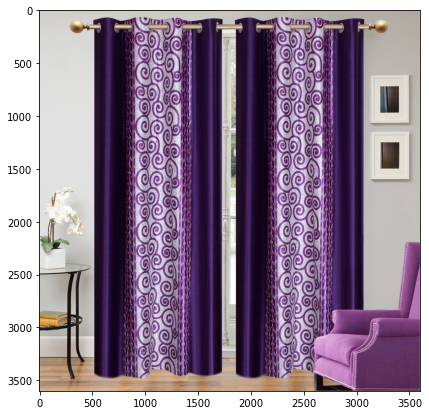

In [6]:
from PIL import Image
path = "/content/drive/MyDrive/Projet_6/Flipkart/Images/"

im = Image.open(path+data_nlp.image[0])

plt.figure(figsize=(7,7))
plt.imshow(im)

Home


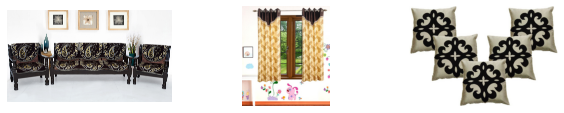

-------
Baby


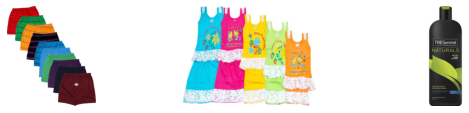

-------
Watches


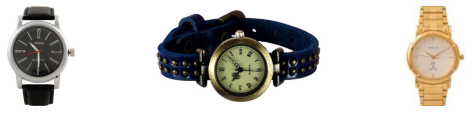

-------
Decor


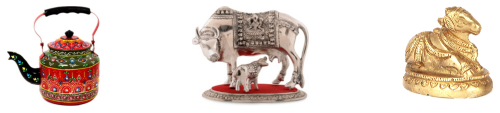

-------
Kitchen


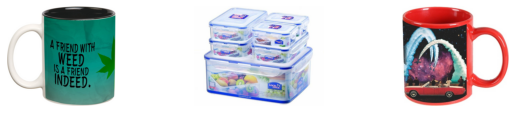

-------
Beauty


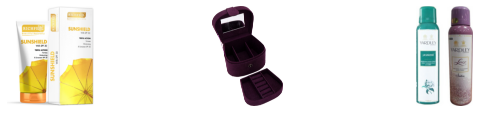

-------
Computers


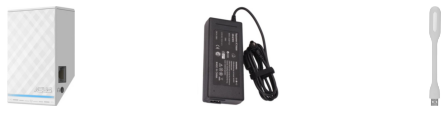

-------


In [7]:
list_labels=data_nlp["category"].unique()


for name in list_labels :
    plt.figure(figsize=(10,15))
    
    print('\033[1m' + name)
    
    for i in range(3):
        plt.subplot(7, 3, i + 1)
        for j in data_nlp[data_nlp["category"]==name].image.sample():
          filename = path + j
          image = imread(filename)
          plt.axis('off')
          plt.imshow(image)
         
    plt.show()
    print("-------")

# Image preprocessing


In [8]:
ima_id = 'e6b483fce5fd910afda67d97dc04e775'

In [9]:
from PIL import Image, ImageOps

# Chargement de l'image en mémoire
img0 = Image.open(path +ima_id+'.jpg')

# Sauvegarde de l'image sur le disque dans le répertoire images_processed
img0.save('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_A_0.jpg', 'jpeg')

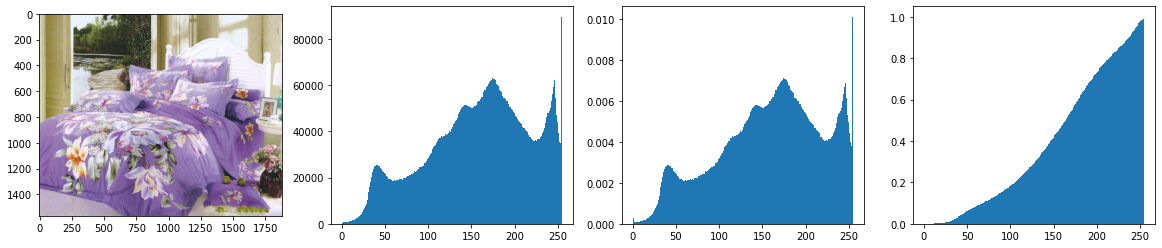

In [10]:
# Transformation de l'image en matrice de pixels
img0_num = np.array(img0)

# Histogrammes
plt.figure(figsize=(20,4))
plt.subplot(141),plt.imshow(img0)
plt.subplot(142),plt.hist(img0_num.flatten(), bins=range(256)) # Histogramme
plt.subplot(143),plt.hist(img0_num.flatten(), bins=range(256), density=True) # Histogramme normalisé
plt.subplot(144),plt.hist(img0_num.flatten(), bins=range(256), density=True, cumulative=True) # Histogramme normalisé cumulé
plt.show()

# Prétraitement de l'image en PIL


In [11]:
#Conversion en niveaux de gris
gray_ = 1
if gray_ == 1:
  img1 = img0.convert('L')
elif gray_ == 0:
  img1 = img0

In [12]:
img1_num = np.array(img1)
img1.save('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_A_1.jpg', 'jpeg')

In [13]:
from PIL import ImageFilter

# Lissage par moyennage (fenêtre de taille 9)
img2a = img1.filter(ImageFilter.BoxBlur(1))
img2a_num = np.array(img2a)
img2a.save('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_A_2a.jpg', 'jpeg')

In [14]:
# Filtre gaussien
img2b = img1.filter(ImageFilter.GaussianBlur(1))
img2b_num = np.array(img2b)
img2b.save('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_A_2b.jpg', 'jpeg')

In [15]:
# Egalisation après réduction de bruit méthode 1
img3a = ImageOps.equalize(img2a, mask = None)
img3a_num = np.array(img3a)
img3a.save('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_A_3a.jpg', 'jpeg')

In [16]:
# Egalisation après réduction de bruit méthode 2
img3b = ImageOps.equalize(img2b, mask = None)
img3b_num = np.array(img3b)
img3b.save('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_A_3b.jpg', 'jpeg')

In [17]:
# contrast
img4a = ImageOps.autocontrast(img2a)
img4a_num = np.array(img4a)
img4a.save('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_A_4a.jpg', 'jpeg')

Prétraitement des images avec PIL 



Text(0.5, 1.0, 'Egalisation (GaussianBlur)')

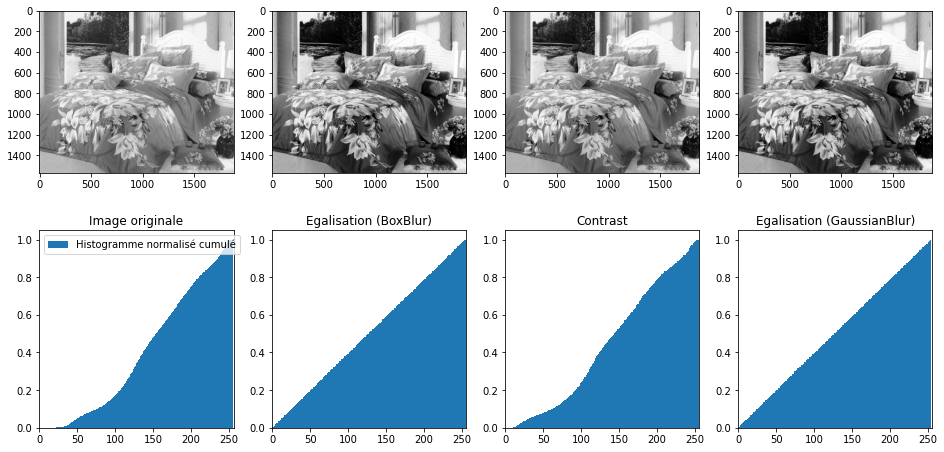

In [18]:
print('Prétraitement des images avec PIL','\n' )
plt.figure(figsize=(16,8))


plt.subplot(241),plt.imshow(img1, cmap='gray')
plt.subplot(242),plt.imshow(img3a, cmap='gray')
plt.subplot(243),plt.imshow(img4a, cmap='gray')
plt.subplot(244),plt.imshow(img3b, cmap='gray')


plt.subplot(245),plt.hist(img1_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.legend(['Histogramme normalisé cumulé'], loc = 'upper left')
plt.title('Image originale')

plt.subplot(246),plt.hist(img3a_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.title('Egalisation (BoxBlur)')

plt.subplot(247),plt.hist(img4a_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.title('Contrast')

plt.subplot(248),plt.hist(img3b_num.flatten(), bins=range(256), density=True, cumulative=True),
plt.xlim([0,256])
plt.title('Egalisation (GaussianBlur)')

# Prétraitement avec avc Opencv


In [19]:
import cv2
print('cv2',cv2.__version__)

cv2 4.1.2


In [20]:
img0 = cv2.imread(path +ima_id+'.jpg') # On charge l'image en couleur en mémoire

**Conversion en niveau gris**

In [21]:
#convert in gray
gray_ = 0

if gray_ == 1:
    img1_ = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY) # Conversion de l'image originale (couleur) en niveaux de gris
     
elif gray_ == 0:
    img1 = img0 # Image en couleur
# Display format:
       # cv2 processes images in BGR mode
    img1_ = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # Transformation BGR --> RGB

In [22]:
cv2.imwrite('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_B_1.jpg', img1) # On sauvegarde l'image sur le disque
                                                                          # dans le répertoire images_processed

True

In [23]:
hist,bins = np.histogram(img1.flatten(),256,[0,256])
cdf1 = hist.cumsum()
cdf1_normalized = cdf1 * hist.max() / cdf1.max()

In [24]:
img1 = cv2.imread('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_B_1.jpg',cv2.IMREAD_GRAYSCALE)


img2_ = cv2.adaptiveThreshold(img1,255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,#gaussian
                              cv2.THRESH_BINARY,15,3) # Image en niveaux de gris
        
cv2.imwrite('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_B_2.jpg', img1)

True

In [25]:
hist,bins = np.histogram(img1.flatten(),256,[0,256])
cdf2 = hist.cumsum()
cdf2_normalized = cdf2 * hist.max() / cdf2.max()

**Egalisation**

In [26]:
#Egalisation méthode 1

img2 = cv2.imread('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_B_2.jpg',0)

img3a = cv2.equalizeHist(img2)
cv2.imwrite('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_B_3a.jpg', img3a)

# Après égalisation, l'image est rendue en niveaux de gris
# Les niveaux sont inversés à l'affichage
# On utilisera donc le paramètre cmap ='gray' pour rétablir les niveaux

True

In [27]:
hist,bins = np.histogram(img3a.flatten(),256,[0,256])
cdf3a = hist.cumsum()
cdf3a_normalized = cdf3a * hist.max() / cdf3a.max()

In [28]:
# Egalisation méthode 2

img2 = cv2.imread('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_B_2.jpg',0)

# On créé un objet CLAHE
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
img3b = clahe.apply(img2)
cv2.imwrite('/content/drive/MyDrive/Projet_6/Flipkart/Image_process/'+ima_id+'_B_3b.jpg', img3b)

True

In [29]:
hist,bins = np.histogram(img3b.flatten(),256,[0,256])
cdf3b = hist.cumsum()
cdf3b_normalized = cdf3b * hist.max() / cdf3b.max()

Prétraitement des images avec OpenCV 



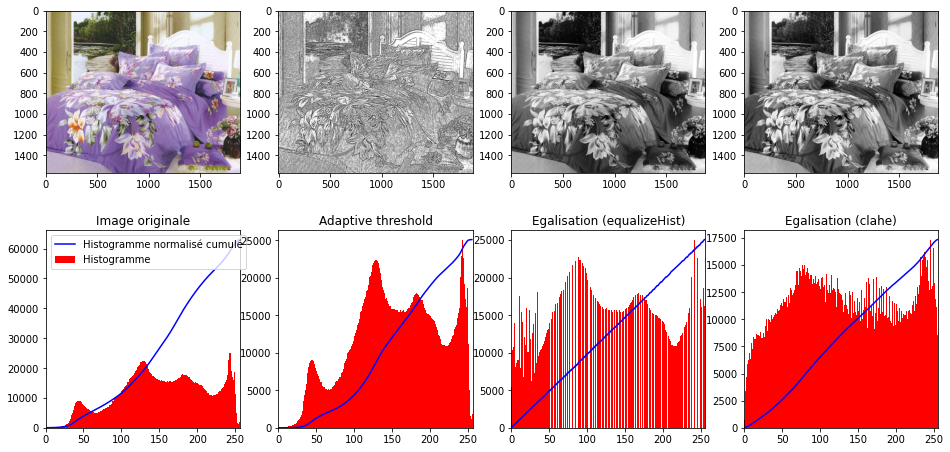

In [30]:
print('Prétraitement des images avec OpenCV','\n')

plt.figure(figsize=(16,8))

if gray_ == 1: 
    plt.subplot(241),plt.imshow(img1_, cmap='gray') # Image affichée en niveaux de gris inversés, on la redresse avec cmap
    plt.subplot(242),plt.imshow(img2_, cmap='gray')
    plt.subplot(243),plt.imshow(img3a, cmap='gray') 
    plt.subplot(244),plt.imshow(img3b, cmap='gray') 

elif gray_ == 0:
    plt.subplot(241),plt.imshow(img1_) # Image affichée en RGB
    plt.subplot(242),plt.imshow(img2_, cmap='gray') 
    plt.subplot(243),plt.imshow(img3a, cmap='gray') 
    plt.subplot(244),plt.imshow(img3b, cmap='gray')
    
plt.subplot(245)
plt.plot(cdf1_normalized,color='b')
plt.hist(img1.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.legend(('Histogramme normalisé cumulé','Histogramme'), loc = 'upper left')
plt.title('Image originale')

plt.subplot(246)
plt.plot(cdf2_normalized,color='b')
plt.hist(img2.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.title('Adaptive threshold')

plt.subplot(247)
plt.plot(cdf3a_normalized,color='b')
plt.hist(img3a.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.title('Egalisation (equalizeHist)')

plt.subplot(248)
plt.plot(cdf3b_normalized,color='b')
plt.hist(img3b.flatten(),256,[0,256],color='r')
plt.xlim([0,256])
plt.title('Egalisation (clahe)')

plt.show()

**Détection des features**

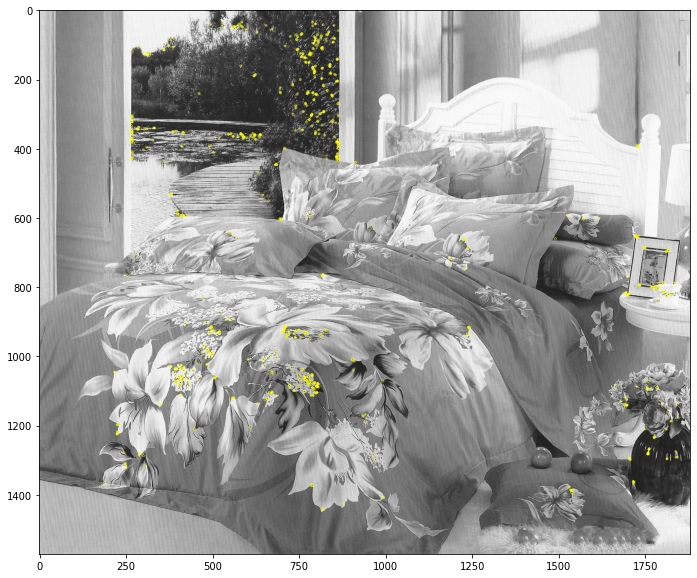

Descripteurs :  (1000, 32)

[[222 160 226 ... 140 116   6]
 [ 89 125  87 ... 243   2  57]
 [165  75 225 ... 251 112 164]
 ...
 [ 62  91 170 ...  31 189 222]
 [ 76  48 189 ... 121 135 115]
 [  1 164 155 ... 192 163 176]]


In [31]:
#Feature detection (SIFT, SURF, ORB)

orb = cv2.ORB_create(1000)
#sift=cv2.SIFT_create()

kp, des = orb.detectAndCompute(img2, None)
img=cv2.drawKeypoints(img2, kp, img2, color=(255, 255, 0))
plt.figure(figsize=(20,10))
plt.imshow(img)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

Vous pouvez aller sur ces documentations #https://docs.opencv.org/4.x/d1/d89/tutorial_py_orb.html
https://medium.com/@shehan.a.perera/a-comparison-of-sift-surf-and-orb-333d64bcaaea

**Appliquer les deux methodes sur les images**

In [32]:
# Redimensionnez le rapport de maintien de l'image PIL et utilisez un fond blanc.
def resize_pil(im, target_width, target_height):       

    target_ratio = target_height / target_width
    im_ratio = im.height / im.width

    if target_ratio > im_ratio:
       # Il doit être fixé par la largeur
        resize_width = target_width
        resize_height = int(resize_width * im_ratio)
    else:
        # Fixé par hauteur
        resize_height = target_height
        resize_width = int(resize_height / im_ratio)

    image_resize = im.resize((resize_width, resize_height), Image.ANTIALIAS)
    background = Image.new('RGBA', (target_width, target_height), (255, 255, 255, 255))
    offset = (int((target_width - resize_width) / 2), int((target_height - resize_height) / 2))
    background.paste(image_resize, offset)
    return background.convert('RGB')

In [33]:
def process_pil(image_num):
     
    # télécharger l'image 
    img_orig = Image.open(path+image_num).convert('L')                      
    
    
    #Filtre de flou gaussien.
    img = img_orig.filter(ImageFilter.GaussianBlur(radius=3)) 
    # Auto-contrast 
    img = ImageOps.autocontrast(img) 
    # Egalisation de l'histogramme                          
    img = ImageOps.equalize(img)
    # Lissage pour eliminer le bruit                              
    img = img.filter(ImageFilter.BoxBlur(1))                   
    # Resize en 224*224   
    img = resize_pil(img, 224,224)                        
    img=np.array(img)

    return img_orig, img

In [34]:
# redimensionner les images opencv
def resize_cv2(img, size):                

  h, w = img.shape[:2]
  sh, sw = size
#https://chadrick-kwag.net/cv2-resize-interpolation-methods/

  # interpolation method
  
  # image qui rétrécit
  if h > sh or w > sw:                
      interp = cv2.INTER_AREA
  # étirement de l'image
  else:                              
      interp = cv2.INTER_CUBIC

  
  # rapport d'aspect de l'image
  aspect = float(w)/h 
  saspect = float(sw)/sh

  # nouvelle image horizontale
  if (saspect > aspect) or ((saspect == 1) and (aspect <= 1)):           
      new_h = sh
      new_w = np.round(new_h * aspect).astype(int)
      pad_horz = float(sw - new_w) / 2
      pad_left, pad_right = np.floor(pad_horz).astype(int),np.ceil(pad_horz).astype(int)
      pad_top, pad_bot = 0, 0

  # nouvelle image verticale
  elif (saspect < aspect) or ((saspect == 1) and (aspect >= 1)):           
      new_w = sw
      new_h = np.round(float(new_w) / aspect).astype(int)
      pad_vert = float(sh - new_h) / 2
      pad_top, pad_bot = np.floor(pad_vert).astype(int), np.ceil(pad_vert).astype(int)
      pad_left, pad_right = 0, 0

  # scale and pad
  scaled_img = cv2.resize(img, (new_w, new_h), interpolation=interp)
  scaled_img = cv2.copyMakeBorder(scaled_img, 
                                  pad_top, pad_bot, pad_left, pad_right,
                                  borderType=cv2.BORDER_CONSTANT, value=255)#color white

  return scaled_img

Vous pouvez allez sur cette documentation #https://chadrick-kwag.net/cv2-resize-interpolation-methods/

In [35]:
def process_cv2(img_index): 

  # convertir en gris
  image = cv2.imread(path+img_index,cv2.IMREAD_GRAYSCALE)  
  # Resize en 224*224         
  img = resize_cv2(image, (224,224))   
   # equalize image histogram                            
  img = cv2.equalizeHist(img)                                       
  #gaussian
  img = cv2.adaptiveThreshold(img, 255,
                              cv2.ADAPTIVE_THRESH_GAUSSIAN_C,       
                              cv2.THRESH_BINARY,15,3)
  
  
# créer un objet CLAHE (les arguments sont facultatifs). utilisé pour améliorer le contraste des images
  clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(3,3))
  img = clahe.apply(img)
  return image,img

In [36]:
data_final=data_nlp[['image','category']]

In [37]:
data_final[data_final['image'] == '0ae859a69c7608d8197c3ba8c37bc6ec.jpg']

image category
694  0ae859a69c7608d8197c3ba8c37bc6ec.jpg    Decor

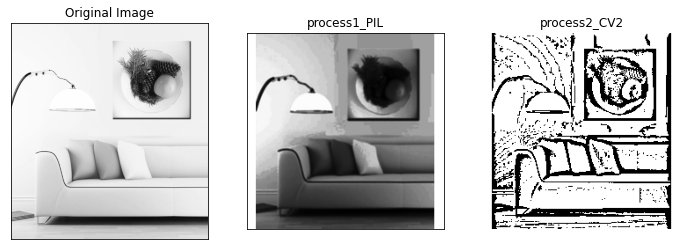

In [38]:
index=694

img_orig, img = process_pil(data_final.image[index])
img_orig, img_cv2 = process_cv2(data_final.image[index])

titles = ['Original Image', 'process1_PIL','process2_CV2']
images = [img_orig, img, img_cv2]
plt.figure(figsize=(12,12))

for i in range(3):

    plt.subplot(1,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.axis('off')
plt.show()

**Processus avec PIL**

Home


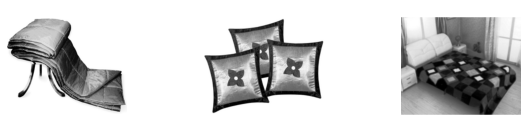

Baby


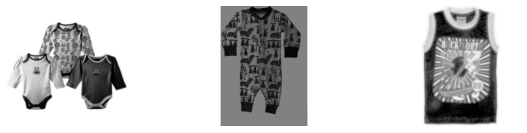

Watches


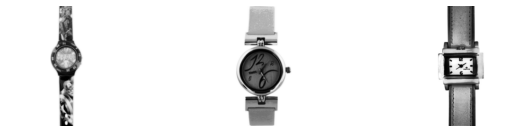

Decor


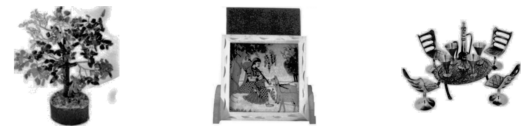

Kitchen


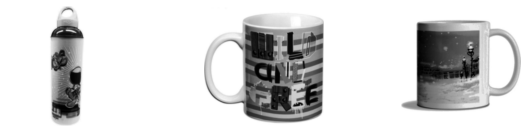

Beauty


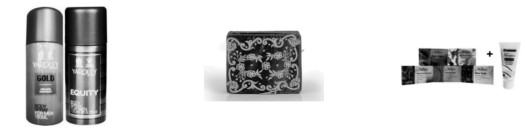

Computers


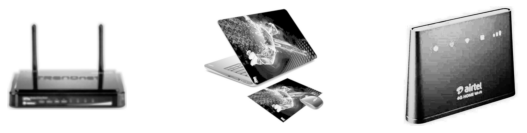

In [39]:
for name in list_labels :
    print('\033[1m' + name)
    # print("-------")
    plt.figure(figsize=(10,18))
    for i in range(3):
      
      plt.subplot(7, 3, i + 1)
      for j in data_nlp[data_nlp["category"]==name].image.sample(3):

          img,cl1 = process_pil(j)
          plt.axis('off')
          plt.imshow(cl1,'gray')       
    plt.show()

In [40]:
# Extraction de points d'intérêts (Keypoints) et descripteurs

def get_descriptors(model, process, nbr_model):
  des_list  = []
  descriptors = np.array([])

  for image_num in data_final['image']:

        #prétraitement pour l'image
        img_orig, img = process(image_num)

        # renvoie les descripteurs d'une image
        kp, des = model.detectAndCompute(img, None)   # model: ORB, SIFT, SURF

        #Renvoie un nouveau tableau de forme et de type donnés, rempli de zéros.
        desc = [np.zeros((nbr_model,))] if des is None else des 
        
        if len(descriptors) == 0:
          descriptors = np.array(desc)
        else:
          # Empilez les tableaux en séquence verticalement (par ligne).
          descriptors = np.vstack((descriptors, desc))  
        # Gardez une trace de l'image à laquelle appartient un descripteur
        des_list.append(desc)
  descriptors = np.asarray(descriptors) 
  return descriptors, des_list

Vous pouvez aller sur la documentation #https://www.youtube.com/watch?v=USl5BHFq2H4&t=387s

In [41]:
def BOVW(descriptors, des_list):
  k = int(round(np.sqrt(len(descriptors)),0))
  print("Number of clusters estimated : ", k)
  print("Creation of",k, "clusters ...")

  # Clustering
  mini_batch = MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=40)
  mini_batch.fit(descriptors)

  # Calculer l'histogramme des caractéristiques et les représenter sous forme de vecteur
  im_features = np.zeros((len(data_nlp['image']), k), "float32")
  for i in range(len(data_nlp['image'])):
      des = des_list[i]
      words=mini_batch.predict(des)
      for w in words:
          im_features[i][w] += 1
  return im_features

Vous pouvez allez sur ces documentations #https://medium.com/@aybukeyalcinerr/bag-of-visual-words-bovw-db9500331b2f
https://www.youtube.com/watch?v=a4cFONdc6nc
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html
https://machinelearningknowledge.ai/image-classification-using-bag-of-visual-words-model/

In [42]:
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.manifold import TSNE
# https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17
#https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

def reduction(im_features):

  umap= UMAP(n_components= 2, init='random', random_state=0)
  proj_umap = umap.fit_transform(im_features)

  pca = PCA(n_components= 95)
  feat_pca= pca.fit_transform(im_features)

  Tsne = TSNE(n_components= 2, init='pca', random_state=0)
  proj_tsne = Tsne.fit_transform(im_features)
  return proj_umap, feat_pca, proj_tsne

Vous pouvez aller sur ces documentations # https://towardsdatascience.com/tsne-vs-umap-global-structure-4d8045acba17
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html

In [43]:
def evaluation(model, process, nbr_model):
  #obtenir le descripteur
  descriptors, des_list = get_descriptors(model, process, nbr_model)

  #bag of visual word
  im_features = BOVW(descriptors, des_list)
  
  
#réduction de dimension
  proj_umap, feat_pca, proj_tsne= reduction(im_features)
  return im_features, proj_umap, feat_pca, proj_tsne

In [44]:
from sklearn import cluster, metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans

def ARI_labels(feats,y_true):
  #Applying standardisation on training feature
  feature_std= StandardScaler().fit_transform(feats)
  cls = cluster.KMeans(n_clusters=7,init ='random', max_iter= 100, n_init=5, random_state=40)
  
  km_mat= cls.fit_transform(feature_std)
  labels= cls.labels_
  ari= metrics.adjusted_rand_score(y_true, labels)
  return labels, ari, km_mat

In [45]:
orb = cv2.ORB_create(1000)

In [46]:
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html

# Perform k-means clustering and vector quantization
from sklearn.cluster import MiniBatchKMeans

temps1=time.time()
# Perform k-means clustering and vector quantization
im_features, proj_umap, feat_pca, proj_tsne = evaluation(orb, process_pil, 32)
duration1=time.time()-temps1
print("traitement kmeans times : ", "%15.2f" % duration1, "secondes")

Number of clusters estimated :  794
Creation of 794 clusters ...
traitement kmeans times :           704.40 secondes


In [47]:
#from sklearn import manifold, decomposition

print("Dimensions dataset before reduction PCA : ", im_features.shape)
print("Dimensions dataset after reduction PCA : ", feat_pca.shape)

Dimensions dataset before reduction PCA :  (1050, 794)
Dimensions dataset after reduction PCA :  (1050, 95)


In [48]:
matrix=[im_features, proj_umap, feat_pca, proj_tsne]
ari_list=[]
for mat in matrix:
  labels, ari,km_mat=ARI_labels(mat,y_true)
  ari_list.append(ari)

In [49]:
df_ari= pd.DataFrame([ari_list],
                    columns=['cluster_km','cluster_umap_km','cluster_pca_km','cluster_tsne_km',],
                    index=['ARI_SCORE_PIL'])

In [50]:
df_ari

cluster_km  cluster_umap_km  cluster_pca_km  cluster_tsne_km
ARI_SCORE_PIL    0.060656         0.025069        0.017226         0.029674

Text(0, 0.5, 'ARI Score')

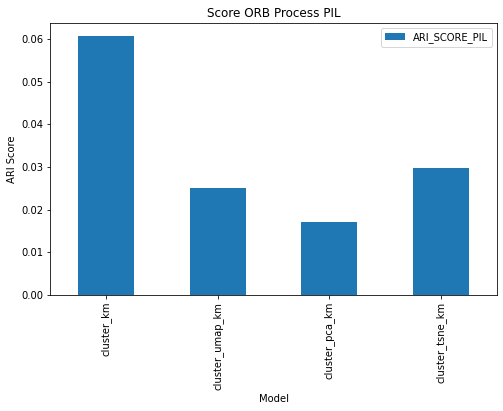

In [51]:
df_ari.T.round(4).plot(kind="bar",figsize=(8,5))
plt.title("Score ORB Process PIL")
plt.xlabel("Model")
plt.ylabel("ARI Score")

In [52]:
# Visualize with : ACP, TSNE, UMAP
def projection(im_features, feat_pca, proj_tsne,proj_umap, label_):
      
    fig, ax = plt.subplots(1, 3, figsize=(18,6))
    tsne_ = TSNE(n_components = 2, random_state=42, init='pca',# reduce to  PCA components, before t-SNE
             ).fit_transform(im_features)
    ax[0].scatter(tsne_[:, 0], tsne_[:, 1], c=label_)
    ax[0].set_xlabel('TSNE_1', fontsize=12)
    ax[0].set_ylabel('TSNE_2', fontsize=12)
    ax[0].set_title('tSNE', fontsize=17)
    ax[0].grid(True)

    ax[1].scatter(feat_pca[:, 0], feat_pca[:, 1], c=label_)
    ax[1].set_xlabel('PCA_1', fontsize=12)
    ax[1].set_ylabel('PCA_2', fontsize=12)
    ax[1].set_title('PCA', fontsize=17)
    ax[1].grid(True)

    ax[2].scatter(proj_umap[:, 0], proj_umap[:, 1], c=label_)
    ax[2].set_xlabel('UMAP_1', fontsize=12)
    ax[2].set_ylabel('UMAP_2', fontsize=12)
    ax[2].set_title('UMAP', fontsize=17)
    ax[2].grid(True)

    plt.legend(label_) 
    plt.tight_layout()
    plt.show()

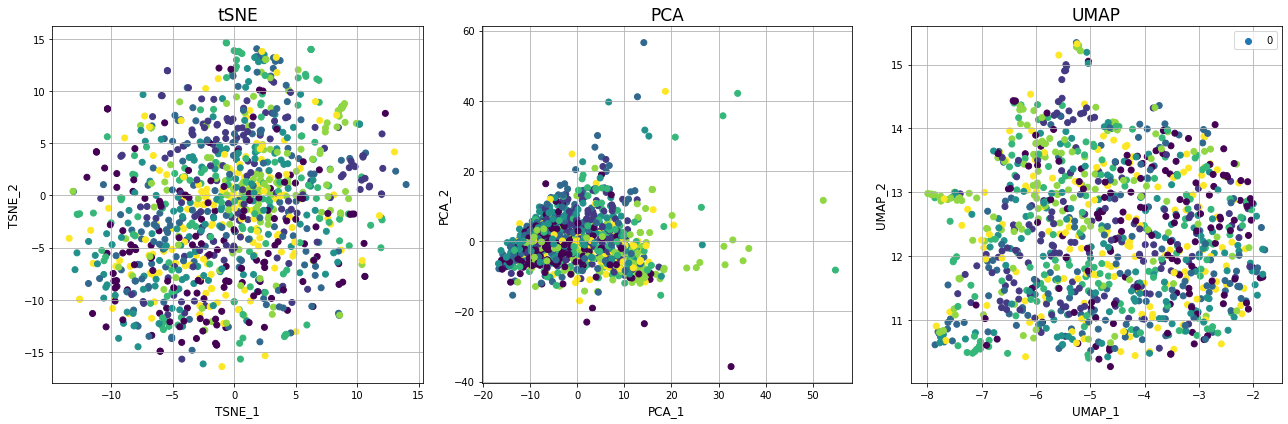

In [53]:
projection(im_features, feat_pca, proj_tsne, proj_umap, y_true)

**Processus avec Opencv**

Home


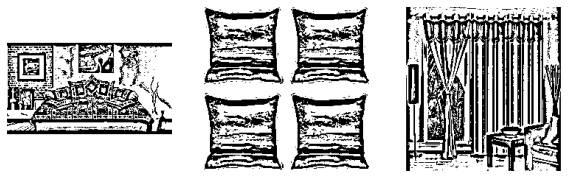

Baby


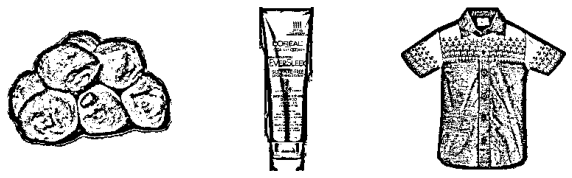

Watches


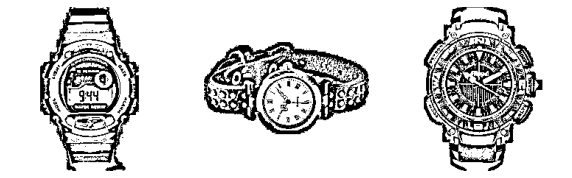

Decor


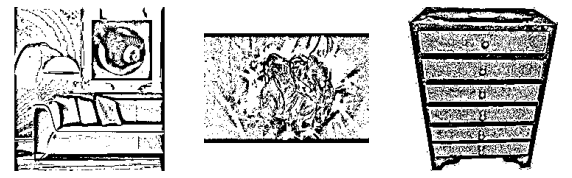

Kitchen


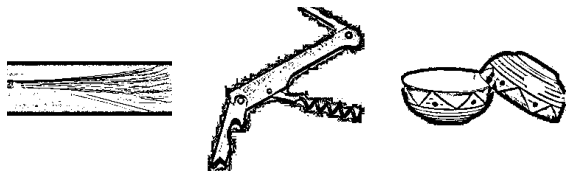

Beauty


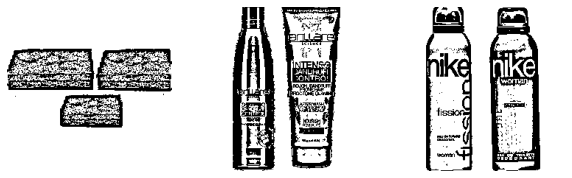

Computers


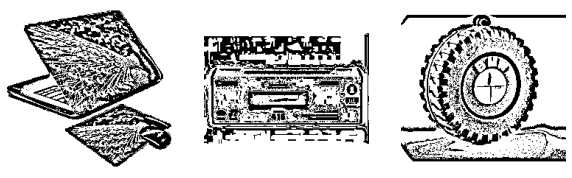

In [54]:
for name in list_labels :
    print(name)
    # print("-------")
    plt.figure(figsize=(10,18))
    for i in range(3):
        plt.subplot(130 + 1 + i)
        for j in data_nlp[data_nlp["category"]==name].image.sample(3):

          img,cl1=process_cv2(j)
          plt.axis('off')
          plt.imshow(cl1,'gray')       
    plt.show()

In [55]:
temps1= time.time()
# # Perform k-means clustering and vector quantization
im_features2, proj_umap2,feat_pca2, proj_tsne2 = evaluation(orb, process_cv2, 32)
duration1 = time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Number of clusters estimated :  906
Creation of 906 clusters ...
temps de traitement kmeans :            79.72 secondes


In [56]:
#from sklearn import manifold, decomposition

print("Dimensions dataset avant réduction PCA : ", im_features2.shape)
print("Dimensions dataset après réduction PCA : ", feat_pca2.shape)

Dimensions dataset avant réduction PCA :  (1050, 906)
Dimensions dataset après réduction PCA :  (1050, 95)


In [57]:
matrix=[im_features2, proj_umap2, feat_pca2, proj_tsne2]
ari_list=[]
for mat in matrix:
  labels, ari, km_mat = ARI_labels(mat, y_true)
  ari_list.append(ari)

In [58]:
df_ari=pd.DataFrame([ari_list],
                    columns=['cluster_km', 'proj_umap', 'cluster_pca_km','cluster_tsne_km'],
                    index=['ARI_SCORE_CV2'])

In [59]:
df_ari

cluster_km  proj_umap  cluster_pca_km  cluster_tsne_km
ARI_SCORE_CV2    0.048597   0.051679        0.004136         0.050271

Text(0, 0.5, 'ARI Score')

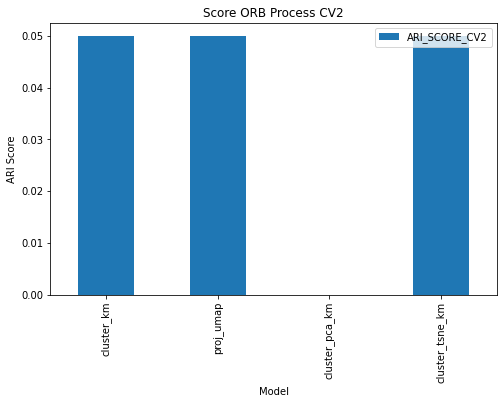

In [60]:
df_ari.T.round(2).plot(kind="bar",figsize=(8,5))
plt.title("Score ORB Process CV2")
plt.xlabel("Model")
plt.ylabel("ARI Score")

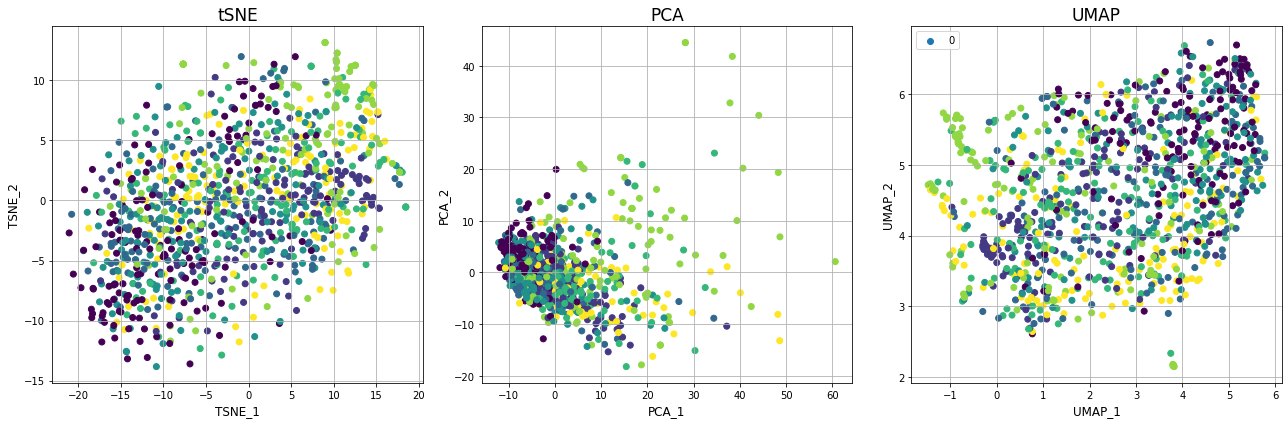

In [61]:
projection(im_features2,feat_pca2,proj_tsne2,proj_umap2,y_true)

# **Tansfert learning CNN**

In [62]:
from tensorflow import keras
from tensorflow.keras.models import Model

from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import resnet50

from tensorflow.keras.applications.resnet50 import ResNet50 
from keras.applications.resnet_v2 import ResNet50V2
#from keras.applications.nasnet import NASNetLarge
from tensorflow.keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception

from keras.applications.vgg16 import preprocess_input as ppss_vgg
from keras.applications.xception import preprocess_input as ppss_xce
from tensorflow.keras.applications.resnet50 import preprocess_input as ppss_resnet
from keras.applications.inception_v3 import preprocess_input as ppss_incep
from keras.applications.resnet_v2 import preprocess_input as ppss_restv2

In [63]:
#https://machinelearningmastery.com/use-pre-trained-vgg-model-classify-objects-photographs/
#Feature extraction
def get_features(model_name, data_preprocessor, input_size, data):
    '''
  1- Créez un extracteur de caractéristiques pour extraire les caractéristiques des données.
    2- Renvoie les caractéristiques extraites et l'extracteur de caractéristiques.
    '''
    #Prepare pipeline.
    input_layer = Input(input_size)
    preprocessor = Lambda(data_preprocessor)(input_layer)
    base_model = model_name(weights='imagenet', include_top=False, input_shape=input_size)(preprocessor)

    avg = GlobalAveragePooling2D()(base_model)
    feature_extractor = Model(inputs = input_layer, outputs = avg)

    #Extract feature.
    feature_maps = feature_extractor.predict(data, batch_size=64, verbose=1)
    print('Feature maps shape: ', feature_maps.shape)
    return feature_maps

In [64]:
data_final.head(5)

image category
0  55b85ea15a1536d46b7190ad6fff8ce7.jpg     Home
1  7b72c92c2f6c40268628ec5f14c6d590.jpg     Baby
2  64d5d4a258243731dc7bbb1eef49ad74.jpg     Baby
3  d4684dcdc759dd9cdf41504698d737d8.jpg     Home
4  6325b6870c54cd47be6ebfbffa620ec7.jpg     Home

In [65]:
# Function to Extract features from the images
#from keras.layers import BatchNormalization, Dense, GlobalAveragePooling2D, Lambda, Dropout, InputLayer, Input
from keras.preprocessing import image

def image_extract_feature(direc, preprocess, model, h, w):
    features = [];

    # extract features from each photo
    for name in data_final['image']:
        # load an image from file
        img = Image.open(path + name) # Lecture de l'image
        img = resize_pil(img, h, w) # Resize en 224*224
        
        # get features
        x = image.img_to_array(img)  #  convert the image pixels to a numpy array
        x = np.expand_dims(x, axis=0) # used to expand the shape of an array. Insert a new axis that will appear at the axis position in the expanded array shape.
        x = preprocess(x)

        resnet_feature = model.predict(x)
        resnet_feature_np = np.array(resnet_feature)
        features.append(resnet_feature_np.flatten())
    #features_np = np.array(features)
  
    return features

In [66]:
#https://www.youtube.com/watch?v=zBOavqh3kWU

# charger les modeles
model_vgg16 = VGG16(include_top=False, weights="imagenet", input_shape=(224,224,3))

model_restnet50 = ResNet50(include_top=False, weights="imagenet", input_shape=(224,224,3))

model_xception = Xception(include_top=True, weights="imagenet", input_shape=(299,299,3), classifier_activation="softmax")

model_inceptionV3 = InceptionV3(include_top=True,weights="imagenet", classifier_activation="softmax")


96124928/96112376 [==============================] - 1s 0us/step


In [67]:
#presentation de mon structure
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [68]:
#presentation de mon structure
model_restnet50.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [69]:
#presentation de mon structure
model_xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [70]:
#presentation de mon structure
model_inceptionV3.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 149, 149, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_4 (BatchNo  (None, 149, 149, 32  96         ['conv2d_4[0][0]']               
 rmalization)                   )                                                      

In [71]:
#presentation de mon structure

In [72]:
def reduce(feature):
    umap= UMAP(n_components=3, init='random',random_state=15)
    proj_umap = umap.fit_transform(feature)

    pca = PCA(n_components= 95, random_state=15)
    feat_pca= pca.fit_transform(feature)

    Tsne = TSNE(n_components=3, init='random',random_state=15)
    proj_tsne = Tsne.fit_transform(feature)

    return proj_umap, feat_pca, proj_tsne

In [73]:
def ari_model(features):
  proj_umap, feat_pca, proj_tsne = reduce(features)
  matrix=[proj_umap, feat_pca, proj_tsne]
  ARI=[]
  for mat in matrix:
    kmeans = KMeans(n_clusters=7, algorithm= 'auto', init= 'k-means++', random_state=15, max_iter=100, n_init=10).fit(mat)
    labels1 = kmeans.labels_
    ari = metrics.adjusted_rand_score(y_true, labels1)
    ARI.append(ari)
  return ARI

**VGG-16**

In [74]:
temps1 =time.time()
# # Perform k-means clustering and vector quantization
features_vgg16 = image_extract_feature(path, ppss_vgg, model_vgg16, 224, 224)
duration1 = time.time()-temps1
print("temps de calculation de VGG16 : ", "%15.2f" % duration1, "secondes")

temps de calculation de VGG16 :           665.66 secondes


In [75]:
ARI_vgg = ari_model(features_vgg16)
ARI_vgg

[0.26004584240636275, 0.13716110526031997, 0.24142454582731707]

**ResNet50**

In [76]:
temps1 =time.time()
# Perform k-means clustering and vector quantization
features_restnet50= image_extract_feature(path, ppss_resnet, model_restnet50, 224, 224)
duration5 = time.time()-temps1
print("temps de calculation de VGG16 : ", "%15.2f" % duration5, "secondes")

temps de calculation de VGG16 :           381.07 secondes


In [77]:
ARI_res = ari_model(features_restnet50)
ARI_res

[0.3321620935907553, 0.34773584096812016, 0.3488223633626378]

**Xception**

In [78]:
temps1 =time.time()
# # Perform k-means clustering and vector quantization
features_xception=image_extract_feature(path, ppss_xce, model_xception,299,299)
duration5 = time.time()-temps1
print("temps de calculation de xception : ", "%15.2f" % duration5, "secondes")

temps de calculation de xception :           694.97 secondes


In [79]:
ARI_xpec=ari_model(features_xception)
ARI_xpec

[0.1949354506435199, 0.06596391522902555, 0.36824780369477894]

**InceptionV3**

In [80]:
temps1 =time.time()
# # Perform k-means clustering and vector quantization
features_inceptionV3 = image_extract_feature(path, ppss_incep, model_inceptionV3,299,299)
duration5 = time.time()-temps1
print("temps de calculation de xception : ", "%15.2f" % duration5, "secondes")

temps de calculation de xception :           532.00 secondes


In [81]:
ARI_incepV3=ari_model(features_inceptionV3)
ARI_incepV3

[0.2130056536488685, 0.07267109518553067, 0.2939461242451959]

# **Evaluation**

In [82]:
comp_ari=pd.DataFrame([ARI_vgg, ARI_res, ARI_xpec, ARI_incepV3]
                    ,columns=['feat_pca','proj_umap', 'proj_tsne'],
                    index=['VGG16','ResNet50', 'Xception','InceptionV3'])

In [83]:
comp_ari.round(2)

feat_pca  proj_umap  proj_tsne
VGG16            0.26       0.14       0.24
ResNet50         0.33       0.35       0.35
Xception         0.19       0.07       0.37
InceptionV3      0.21       0.07       0.29

Text(0, 0.5, 'ARI Score')

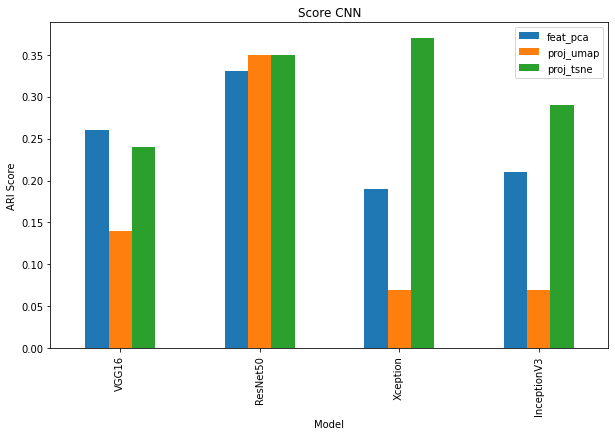

In [84]:
comp_ari.round(2).plot(kind="bar",figsize=(10,6))
plt.title("Score CNN")
plt.xlabel("Model")
plt.ylabel("ARI Score")

# Analyse des clusters

In [85]:
from sklearn.metrics import make_scorer,adjusted_rand_score
from sklearn.model_selection import GridSearchCV

km=KMeans(n_clusters=7)
score= make_scorer(adjusted_rand_score)

parameters = {'init':('k-means++', 'random'),
              'max_iter':[50,100,120],
              'n_init':[5,10,15],
              'algorithm':['auto', 'full', 'elkan'],
              'random_state': [20,25,30,40,60,]}

tsne = TSNE(n_components=2)
tsne_matrix = tsne.fit_transform(features_xception)

# Grid search
grid = GridSearchCV(km, parameters, scoring=score)
grid.fit(tsne_matrix, y_true)
index_grid=grid.cv_results_['rank_test_score'].tolist().index(1)
print("ARI score mean :"+ str(grid.cv_results_['mean_test_score'][index_grid]))
print("Best parameters: "+ str(grid.best_params_))

ARI score mean :0.5131220892849669
Best parameters: {'algorithm': 'auto', 'init': 'random', 'max_iter': 50, 'n_init': 5, 'random_state': 25}


In [86]:
tsne = TSNE(n_components=2)
tsne_matrix = tsne.fit_transform(features_xception)

kmeans = KMeans(n_clusters=7, algorithm='auto', init= 'random', max_iter=50, n_init= 15, random_state=20).fit(tsne_matrix)
labels_ts = kmeans.labels_

In [87]:
round(metrics.adjusted_rand_score(y_true, labels_ts), 2)

0.44

In [129]:
def plot_tsne_pca(matrix, title, labels):

# Dimensionality reduction using PCA,
    # reduce the tfidf matrix to just 2 features

    pca = PCA(n_components= 2, random_state=5).fit_transform(matrix)
    tsne = TSNE(n_components= 2, random_state=5).fit_transform(matrix)  

    #attaching the label to each 2D projection
    pca_data = np.vstack((pca.T,labels)).T
    pca_df = pd.DataFrame(pca_data, columns=['pca-one','pca-two','category'])

    tsne_data = np.vstack((tsne.T,labels)).T
    tsne_df = pd.DataFrame(tsne_data, columns=['tsne-one','tsne-two','category'])
   
    #idx = np.random.choice(range(pca.shape[0]),  size=500, replace=False)
    f, ax = plt.subplots(1, 2, figsize=(14, 6))

    sns.scatterplot(data=pca_df, x="pca-one", y="pca-two", hue='category',ax=ax[0])
    ax[0].set_title('PCA selon les catégories')
    
    sns.scatterplot(data=tsne_df, x="tsne-one", y="tsne-two", hue='category', ax=ax[1])
    ax[1].set_title('TSNE selon les clusters ')

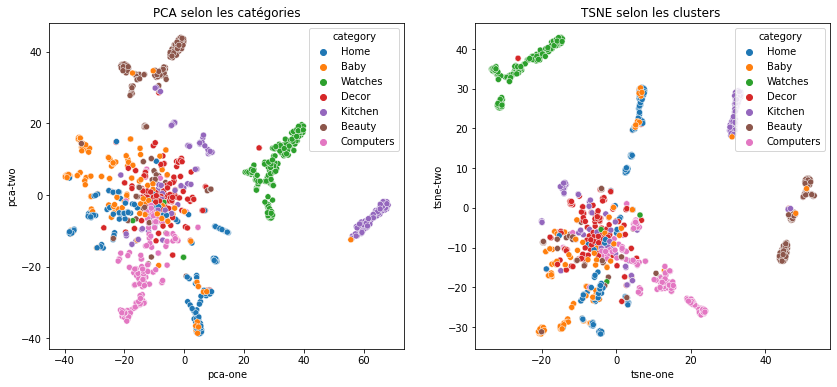

In [130]:
plot_tsne_pca(tsne_matrix,'CNN_tsne',data_final['category'])

In [115]:
data_final['cluster_tsne']= labels_ts
metrics.confusion_matrix(y_true, data_final['cluster_tsne'])

array([[  8,  45,   0,  18,  79,   0,   0],
       [  0,   0,   0,   2,   3, 145,   0],
       [  7,  12,   1, 121,   5,   4,   0],
       [  5, 102,   2,  30,  10,   0,   1],
       [  4,   4, 112,  28,   2,   0,   0],
       [111,   1,   0,  38,   0,   0,   0],
       [ 14,   3,  11,  51,   0,   0,  71]])

In [116]:
np.argmax(metrics.confusion_matrix(y_true, data_final['cluster_tsne']), axis=0)

array([5, 3, 4, 2, 0, 1, 6])

In [117]:
conf_mat =metrics.confusion_matrix(y_true, data_final['cluster_tsne'])
corresp = np.argmax(conf_mat, axis=0)
labels = pd.Series(y_true, name="y_true").to_frame()

labels['y_pred_transform'] = data_final['cluster_tsne'].apply(lambda x : corresp[x])


conf_mat = metrics.confusion_matrix(y_true, labels['y_pred_transform'])
conf_mat

array([[ 79,   0,  18,  45,   0,   8,   0],
       [  3, 145,   2,   0,   0,   0,   0],
       [  5,   4, 121,  12,   1,   7,   0],
       [ 10,   0,  30, 102,   2,   5,   1],
       [  2,   0,  28,   4, 112,   4,   0],
       [  0,   0,  38,   1,   0, 111,   0],
       [  0,   0,  51,   3,  11,  14,  71]])

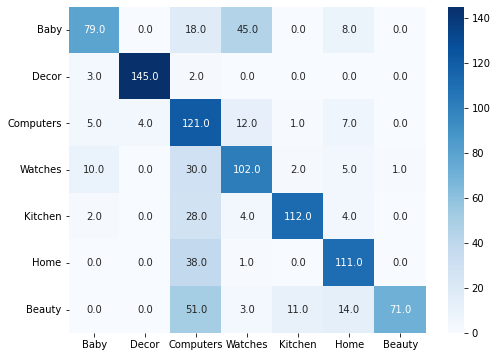

In [118]:
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
list_labels=['Baby','Decor','Computers','Watches','Kitchen','Home','Beauty']
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [label for label in list_labels])
plt.figure(figsize = (8,6))
sns.heatmap(df_cm, annot=True, fmt='.1f', cmap="Blues")

In [119]:
print(metrics.classification_report(y_true, labels['y_pred_transform']))

              precision    recall  f1-score   support

           0       0.80      0.53      0.63       150
           1       0.97      0.97      0.97       150
           2       0.42      0.81      0.55       150
           3       0.61      0.68      0.64       150
           4       0.89      0.75      0.81       150
           5       0.74      0.74      0.74       150
           6       0.99      0.47      0.64       150

    accuracy                           0.71      1050
   macro avg       0.77      0.71      0.71      1050
weighted avg       0.77      0.71      0.71      1050



In [120]:
cluster

{0: 'Home',
 1: 'Watches',
 2: 'Decor',
 3: 'Baby',
 4: 'Beauty',
 5: 'Computers',
 6: 'Kitchen'}

In [96]:
data_final.tail(10)

image category  cluster_tsne
1040  3b465b02720ef7c930cb2e065a8fc05d.jpg     Baby             3
1041  b1644f47c7dfa58f8c06677f2a27ee09.jpg     Baby             4
1042  057836ecde71565f8ebdd576e41fdc96.jpg     Baby             4
1043  38782cce965307ddcdbedfcb7fa409c3.jpg     Baby             4
1044  be0f39341d771aac57084970f1ed6425.jpg     Baby             3
1045  958f54f4c46b53c8a0a9b8167d9140bc.jpg     Baby             4
1046  fd6cbcc22efb6b761bd564c28928483c.jpg     Baby             3
1047  5912e037d12774bb73a2048f35a00009.jpg     Baby             3
1048  c3edc504d1b4f0ba6224fa53a43a7ad6.jpg     Baby             4
1049  f2f027ad6a6df617c9f125173da71e44.jpg     Baby             3

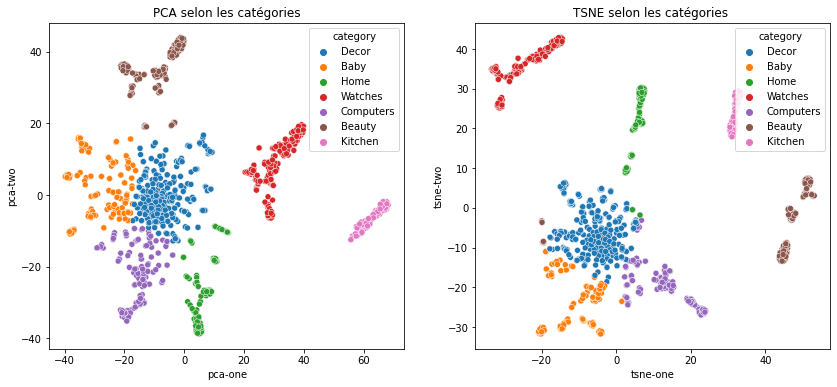

In [121]:
cluster  = {0: 'Home',
            1: 'Watches',
            2: 'Decor',
            3: 'Baby',
            4: 'Beauty',
            5: 'Computers',
            6: 'Kitchen'}

labels_transform = labels['y_pred_transform'].map(cluster)
plot_tsne_pca(tsne_matrix,'CNN_tsne_cluster', labels_transform)

In [122]:
data_final['cluster_tsne']= labels_transform

Decor


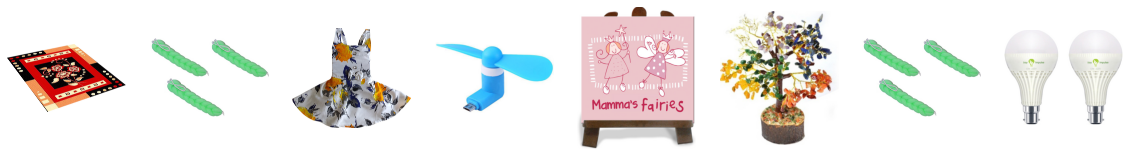

-------
Baby


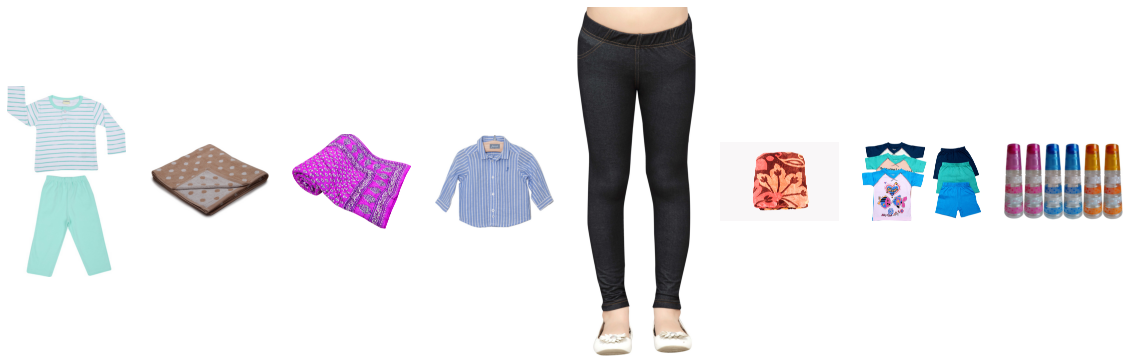

-------
Home


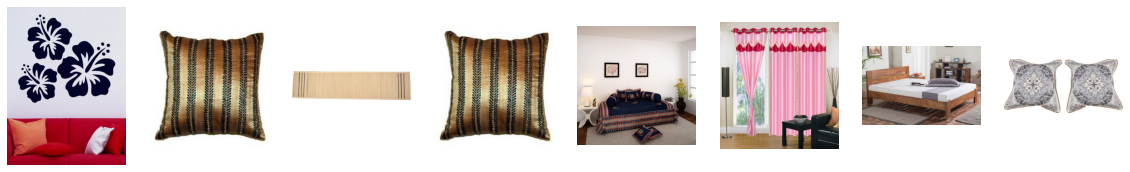

-------
Watches


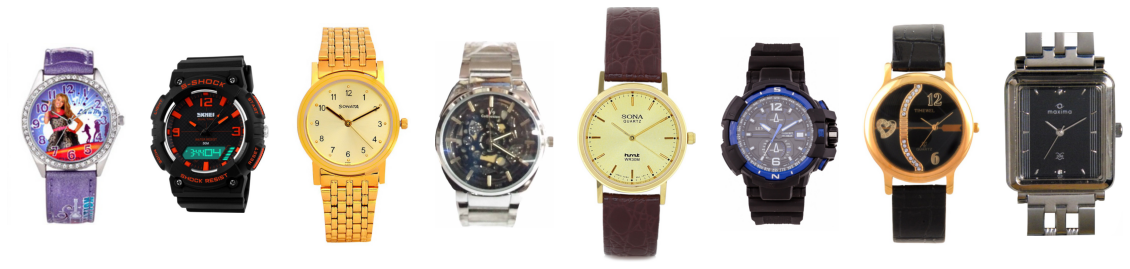

-------
Computers


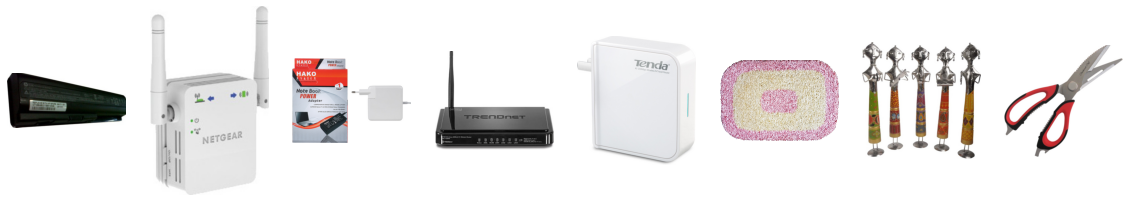

-------
Beauty


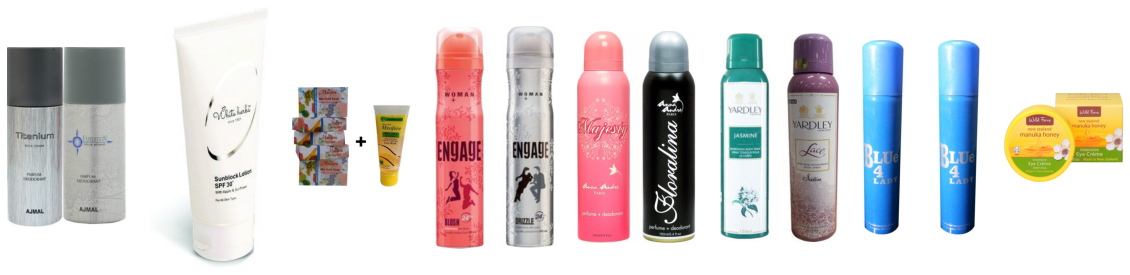

-------
Kitchen


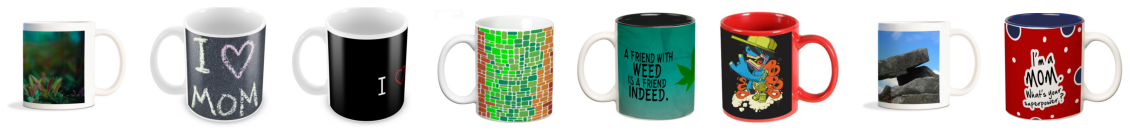

-------


In [99]:
list_labels= data_final['cluster_tsne'].unique()
path = "/content/drive/MyDrive/Projet_6/Flipkart/Images/"

#plt.figure(figsize=(12,12))
for name in list_labels :
    plt.figure(figsize=(20,10))

    print(name)
    # print("-------")
    for i in range(8):
        plt.subplot(180 + 1 + i)
        for j in data_final[data_final['cluster_tsne']==name].image.sample(3):
          filename = path + j
          image = imread(filename)
          plt.axis('off')
          plt.imshow(image)
    plt.show()
    print("-------")

# Test d'évaluation

In [100]:
from PIL import Image
from random import *

path = "/content/drive/MyDrive/Projet_6/Flipkart/Images/"
def test(index):
    im = Image.open(path+ data_nlp.image[index])
    print('Name:  ',data_nlp['product_name'].iloc[index])
    print('categorie: ',data_final['category'].iloc[index])

    print('cluster: ',data_final.cluster_tsne.iloc[index])

    plt.figure(figsize=(7,7))
    plt.imshow(im)

Name:   Elegance Polyester Multicolor Abstract Eyelet Door Curtain
categorie:  Home
cluster:  Decor


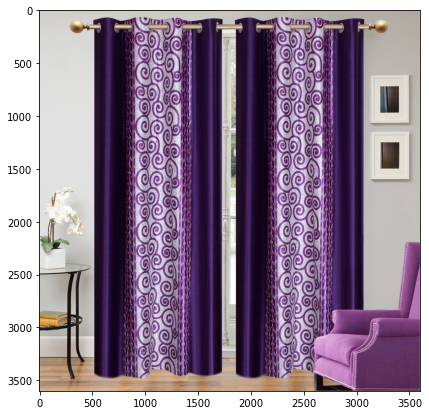

In [101]:
test(0)

Name:   Nike Original Combo Set
categorie:  Beauty
cluster:  Beauty


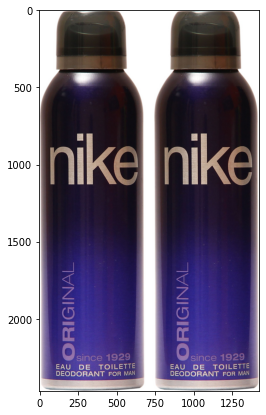

In [102]:
test(377)

Name:   Elite Collection Medium Acrylic Sticker
categorie:  Baby
cluster:  Decor


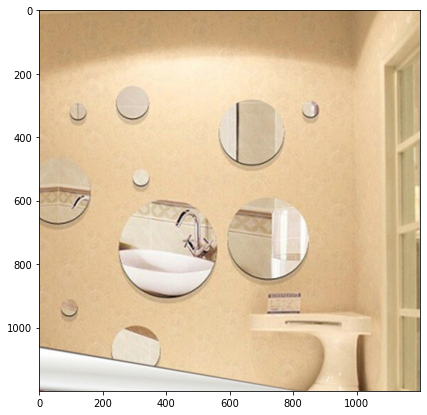

In [103]:
test(1040)

Name:   Intex Kids Inflatable Air Chair
categorie:  Baby
cluster:  Decor


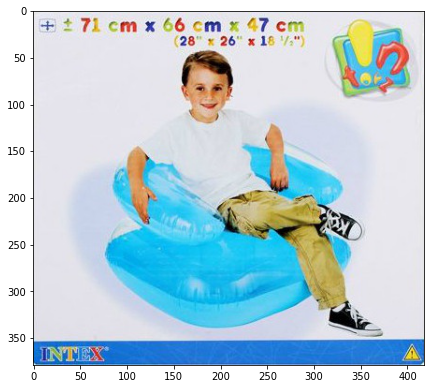

In [104]:
test(889)

Name:   Filink 310 Black Toner
categorie:  Computers
cluster:  Decor


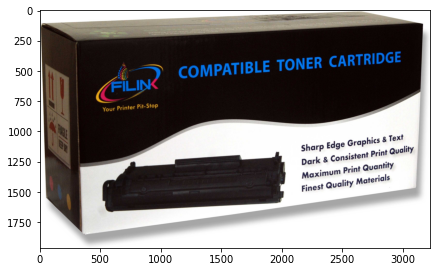

In [105]:
test(115)